<a href="https://colab.research.google.com/github/PedemonteGiacomo/DataScienceProject/blob/main/S4861715_PedemonteGiacomoSpotifyDAESPORRE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Progetto Introduzione alla Data Science***



***Pedemonte Giacomo S4861715***

Progetto basato sull'analisi del dataset top50 globale di Spotify alla ricerca della "ricetta" perfetta per una canzone di successo.

Andremo ad analizzare le caratteristiche delle canzoni a nostra disposizione, le quali sono alcune delle più famose proprio del 2019(anno di uscita della playlist in questione).

Cosa caratterizza queste canzoni?
Come si potrebbe assegnare un genere ad una canzone di cui disponiamo solo delle caratteristiche?
Come si potrebbe predire la popolarità di una canzone di cui conosciamo solo determinati attributi?

Bisogna comunque dire per avere una maggiore consapevolezza, che non si può estrapolare la "ricetta perfetta" per la canzone di successo dato che non sono solo questi attributi che rendono più o meno popolare una canzone o meglio posizionata in classifica (e questo lo vedremo proprio data la non troppa correlazione dei dati in analisi).

***Importazione librerie per ambiente di lavoro:***

**Nota:** eseguire con "Riavvia ed esegui" 2 volte per installare scipy alla versione più recente (altrimenti la alternative dei t-test riportati non funzionerà).

In [ ]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
import plotly.express as px
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np
!pip install scipy==1.7.0
import scipy.stats as stats
import scipy
print (scipy.__version__)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
1.7.0


****Analisi ed estrazione dei Dati****



Importazione e visualizzazione della "testa" del database contenente la playlist spotify: top50 del 2019.





In [ ]:
top50 = pd.read_csv('top50.csv')
top50.head()

,Position,Track.Name,Artist.Name,Genre,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
0,1,Senorita,Shawn Mendes,canadian pop,117,55,76,-6,8,75,191,4,3,79
1,2,China,Anuel AA,reggaeton flow,105,81,79,-4,8,61,302,8,9,92
2,3,boyfriend (with Social House),Ariana Grande,dance pop,190,80,40,-4,16,70,186,12,46,85
3,4,Beautiful People (feat. Khalid),Ed Sheeran,pop,93,65,64,-8,8,55,198,12,19,86
4,5,Goodbyes (Feat. Young Thug),Post Malone,dfw rap,150,65,58,-4,11,18,175,45,7,94


In [ ]:
top50.shape

(50, 14)

**DESCRIZIONE DELLE FEATURES**

Abbiamo quindi **50 canzoni e 14 attributi legati ad esse**:

- **Position** = identificativo della canzone che rappresenta la posizione nella top50 playlist

- **Track.Name** = nome della traccia

- **Artist.name** = nome dell'artista

- **Genre** = genere della traccia

- **Beats.Per.Minute** = il "tempo" della canzone. 

- **Energy** = l'energia di una canzone - maggiore è il valore più la canzone ne ha

- **Danceability** = maggiore è il valore, più è facile da ballare la canzone

- **Loudness..dB** = maggiore è il valore, maggiore è la "rumorosità" della canzone

- **Liveness** = più è alto più è come se fosse una registrazione dal vivo..

- **Valence** = piu è alto il valore, maggiore è il mood positivo della canzone.

- **Length** = lunghezza della canzone/durata.

- **Acousticness** = maggiore è il valore, più la canzone è "acustica"

- **Speechness** = maggiore è il valore, maggiore sarà il numero delle parole utilizzate all'interno della canzone.

- **Popularity** = più è alto il valore, più la canzone sarà popolare.

**SCOPO DELL'ANALISI**

Analizzeremo appunto queste caratteristiche cercando di risponderci alla domanda : 
- **quali sono le caratteristiche che rendono una canzone di successo?**

Questa domanda quindi ci portera ad una successiva domanda:
- **Si può predire la popolarità di una canzone avendo solo a disposizione i dati che la caratterizzano?**

***INIZIO ANALISI***

Partiamo subito da una descrizione tabellare dei dati a nostra disposizione:

In [ ]:
top50.describe()

,Position,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
count,50.00000,50.000000,50.000000,50.00000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,25.50000,120.060000,64.060000,71.38000,-5.660000,14.660000,54.600000,200.960000,22.160000,12.480000,87.500000
std,14.57738,30.898392,14.231913,11.92988,2.056448,11.118306,22.336024,39.143879,18.995553,11.161596,4.491489
min,1.00000,85.000000,32.000000,29.00000,-11.000000,5.000000,10.000000,115.000000,1.000000,3.000000,70.000000
25%,13.25000,96.000000,55.250000,67.00000,-6.750000,8.000000,38.250000,176.750000,8.250000,5.000000,86.000000
50%,25.50000,104.500000,66.500000,73.50000,-6.000000,11.000000,55.500000,198.000000,15.000000,7.000000,88.000000
75%,37.75000,137.500000,74.750000,79.75000,-4.000000,15.750000,69.500000,217.500000,33.750000,15.000000,90.750000
max,50.00000,190.000000,88.000000,90.00000,-2.000000,58.000000,95.000000,309.000000,75.000000,46.000000,95.000000


Queste sono le **distrubuzioni** in percentuale dei dati che stiamo analizzando, solamente quelli quantitativi come possiamo notare.
QUesto ovviamente dato che a quelli qualitativi non è possibile applicare formule matematiche a meno che non si rendano quantitativi(in seguito lo si farà per la predizione del genere, tra l'altro sono dati sui quali poi si formeranno dei box plot riportati nel seguito). 



Andiamo a vedere ora **quante canzoni ci sono per genere** in questa top50 andando a visualizzare il tutto con un istogramma:

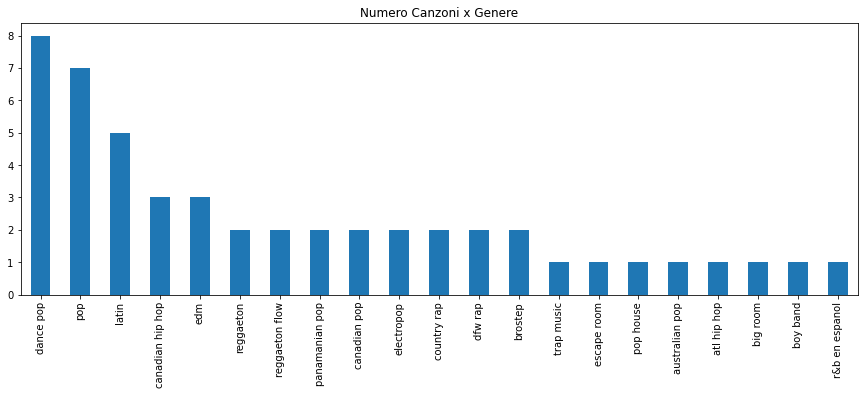

In [ ]:
num_genre = top50['Genre'].value_counts()
num_genre.plot(kind = 'bar',title = 'Numero Canzoni x Genere', fontsize = 10, figsize = (15,5))

E' il **dance pop** quindi il** genere contenente più canzoni presenti nella top50 globale del 2019 con 8 canzoni**, seguito subito dal pop che invece ne presenta 7.

Vediamo quante **canzoni diverse** ci sono **per** ogni **artista** presente nella playlist:

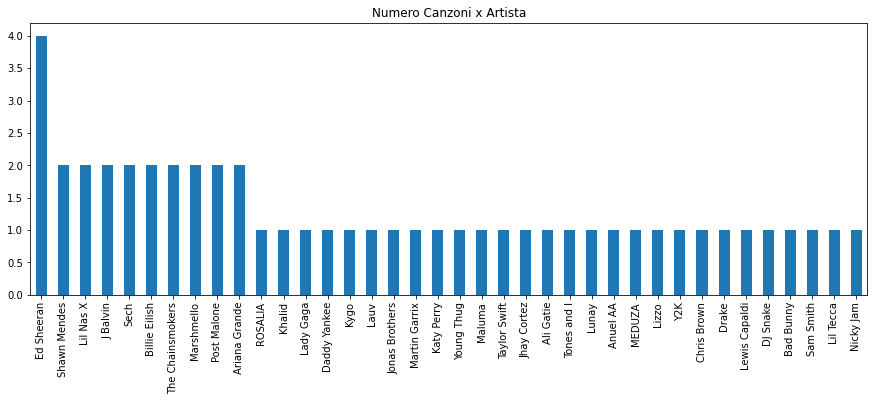

In [ ]:
num_artist_name = top50['Artist.Name'].value_counts()
num_artist_name.plot(kind = 'bar',title = 'Numero Canzoni x Artista', fontsize = 10, figsize = (15,5))

**Ed Sheeran risulta essere l'artista con più canzoni** in questa classifica, ben 4!

Ci possiamo anche però porre se fosse il più popolare e quindi dobbiamo vedere un istrogramma della popolarità delle canzoni raggruppandole per genere:

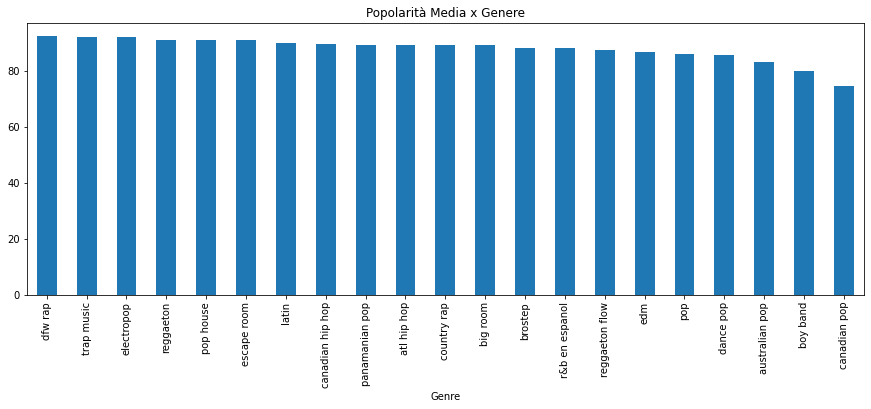

In [ ]:
top50.groupby('Genre')['Popularity'].mean().sort_values(ascending = False).plot(kind='bar',title = 'Popolarità Media x Genere', fontsize = 10, figsize = (15,5))

Da questo grafico si evince che il **dance pop**, il genere che presenta più canzoni nella top50, **non è quello che ha la media di popularità più alta**.

Questo perchè è la popolarità media e i generi che presentano sono una canzone sono "avvantaggiati" nel calcolo di questa media.


Essendo appunto la top50 globale pressocchè tutte le canzoni sono popolari e quindi riotteniamo appunto il grafico come se stessimo analizzando il numero di valori di canzoni presenti per genere.

Vediamo quindi **quale genere ha la media più alta di posizionamento** in questa top50:

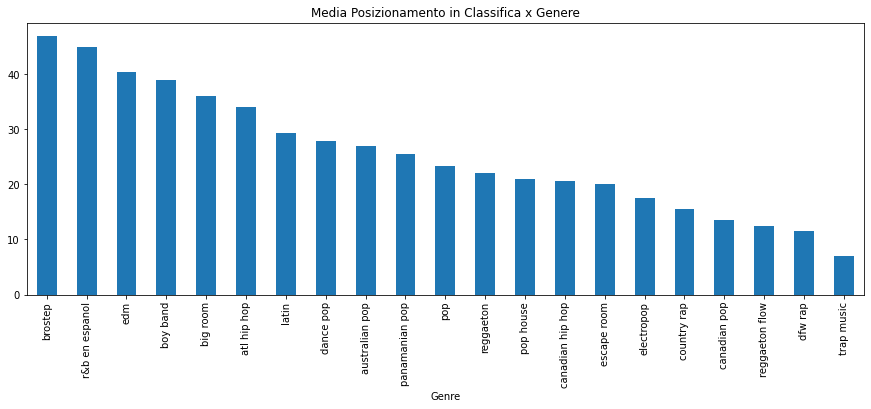

In [ ]:
top50.groupby('Genre')['Position'].mean().sort_values(ascending = False).plot(kind='bar',title = 'Media Posizionamento in Classifica x Genere', fontsize = 10, figsize = (15,5))

In questo caso si vede come il genere "messo meglio" in classifica con una media del posizionamento è il genere: trap music

Ora andiamo a vedere le **analogie tra genere e Beats Per Minuto**:

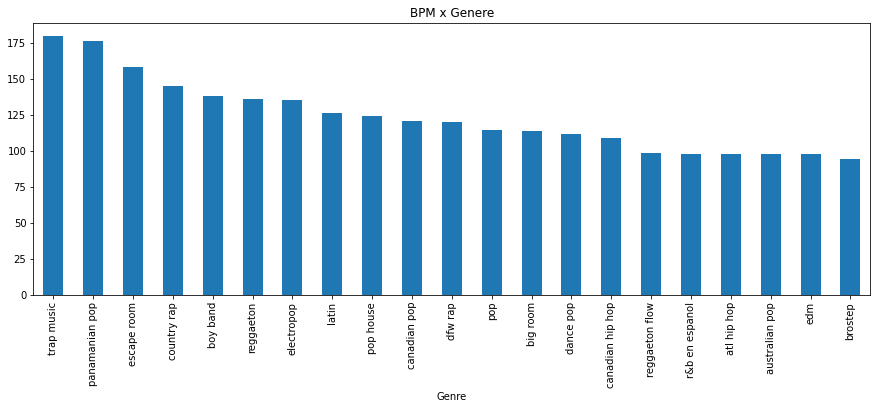

In [ ]:
top50.groupby('Genre')['Beats.Per.Minute'].mean().sort_values(ascending = False).plot(kind='bar',title = 'BPM x Genere', fontsize = 10, figsize = (15,5))

:Si evince dal grafico soprastante che il genere con più battiti è la trap music, il quale è anche il genere posizionato mediamente meglio in classifica(anche dato il fatto che è presente un unica canzone di questo genere).

Studiamo quindi se e come infuisce il numero di battiti per minuto con la popolarità della canzone dato che il genere con il più alto numero di bpm è anche il genere piazzato meglio mediamente nella top50 analizzata.

Analizziamo ora qual'è il **genere con il maggior numero di parole diverse utilizzate all'intero della canzone**: 

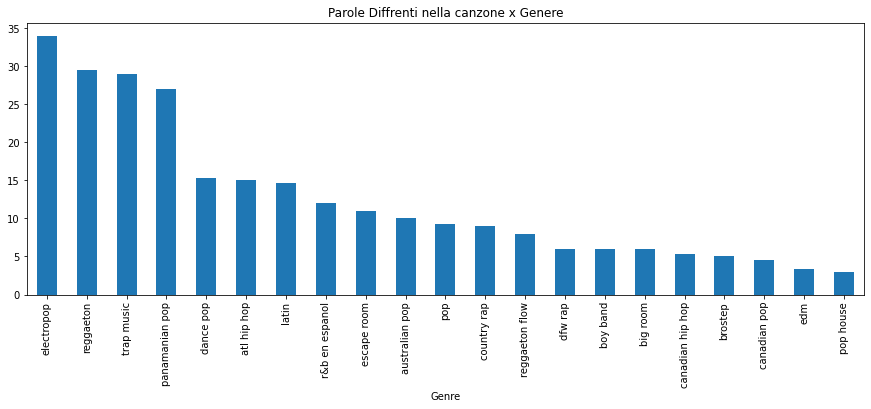

In [ ]:
top50.groupby('Genre')['Speechiness.'].mean().sort_values(ascending = False).plot(kind='bar',title = 'Parole Diffrenti nella canzone x Genere', fontsize = 10, figsize = (15,5))

Si vede bene come sia l'**electropop il genere che presenta più parole differenti** all'interno dei testi delle canzoni, seguito subito da reggaeton e trap music.

Quest'ultimo è sempre presente i queste analisi ed è effettivamente un genere che riesce a differenziarsi molto dagli altri in molti aspetti e sta spopolando in questi anni su spotify e su tutte le piattaforme di musica.

Non siamo comunque ancora riusciti ad evidenziare caratteristiche fondamentali per il successo di una canzone anche se numero di bpm ed il valore legato allo speechiness della canzone possono darci un indicazione di base.



***Analizziamo il posizionamento della classifica per levarci il dubbio che la canzone prima in classifica sia la più popolare***:

***Position to Popularity***

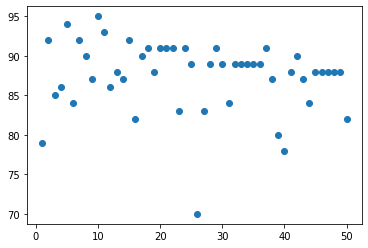

In [ ]:
plt.scatter(top50['Position'],top50['Popularity'])

**Si riesce ad estrapolare il dato che la canzone prima in classifica non è la più popolare!**

Quella più popolare si trova circa al decimo posto, un fatto curioso!

Ora andiamo a visualizzare altri di questi grafici a dispersione ma cerchiamo di capire maggiormente se c'è un possibile legame tra gli attributi e la popolarità.

Andiamo a vedere in sostanza quali caratteristiche hanno prevalentemente le canzoni in questa top50 per poter consigliare cosi valori da usare per provare a creare una canzone di successo con maggiore fiducia.

**Confrontiamo quindi qua sotto una caratteristica alla volta della canzone e vediamo quanto influisce sulla popolarità** dato che le nostre previsioni finali dovranno riuscire a trovare una popolarità partendo dagli attributi della canzone.

***BPM to Popularity***

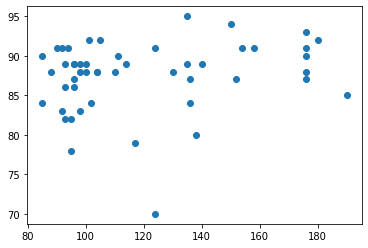

In [ ]:
plt.scatter(top50['Beats.Per.Minute'],top50['Popularity'])

Si può dire che all'aumentare dei BPM non aumenta la pooplarità, però si riesce ad estrarre l'informazione che la maggior parte delle canzoni presenti nella playlist che hanno un numero di BPM tra **80 e 120** hanno una popolarità abbastanza coesa e comunque abbastanza alta mediamente. 

Mentre più aumenta il valore di BPM e più questa coesione viene meno anche se è proprio in questo gruppo che vi sono le canzoni più presenti.

In sostanza si può evincere che non è in base al numero di bpm che si riesce a trovare una popolarità più o meno alta ma abbiamo analizzato appunto quello sopra riportato.

***Danceability to Popularity***

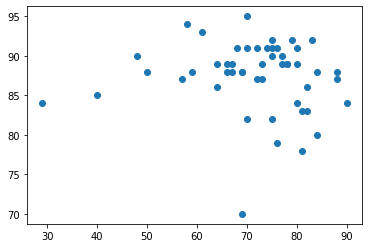

In [ ]:
plt.scatter(top50['Danceability'],top50['Popularity'])

Da questo grafico si può notare come nella playlist sia presente un numero predominante di canzoni con un **livello di ballabilità alto**, però anche la canzone con meno ballabilità ha un valore medio di popolarità, anche se la maggioranza delle canzoni con più ballabilità è più popolare come vediamo dalla densità "di pallini" in alto nel grafico. 

***Liveness  to Popularity***

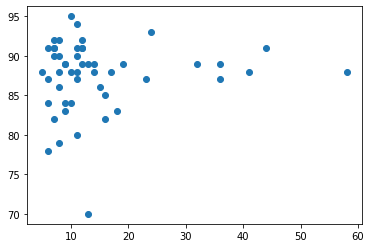

In [ ]:
plt.scatter(top50['Liveness'],top50['Popularity'])

Si evince dal grafico che la maggior parte delle canzoni presenti all'interno della playlist hanno una **liveness minore di 20**, in questo gruppo c'è peraltro la canzone più popolare della playlist.

***Length to Popularity***

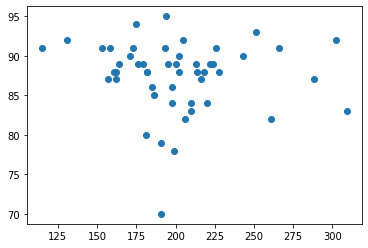

In [ ]:
plt.scatter(top50['Length.'],top50['Popularity'])

La maggior parte delle canzoni che sono presenti nella playlist hanno una durata compresa tra i **159 e 225 secondi**, tra di queste c'è anche la più popolare. 

Anche in questo caso comunque non si può nè arrivare alla conclusione che più aumenta la durata e più aumenta la popolarità della canzone nè viceversa, ma siamo riusciti comunque a trovare un "carattere" comune a molte canzoni della playlist(appunto questo valore di lunghezza).

***Acousticness to Popularity***

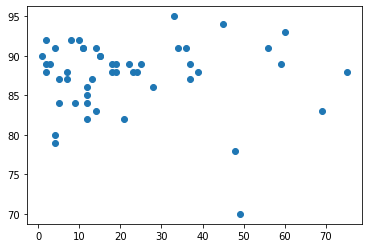

In [ ]:
plt.scatter(top50['Acousticness..'],top50['Popularity'])

C'è più coesione nella distribuzione dei dati sulla popolarità delle canzoni con un livello di acousticness compreso **tra 0 e 20** quindi la maggior parte delle canzoni nella playlist ha questi valori di acousticness, ma la più popolare si trova nel gruppo restante, dove la varianza della popolarità è notevolmente maggiore, così come il range di acousticness che anch'esso risulta essere più grande(20-80).

***Speechiness to Popularity***

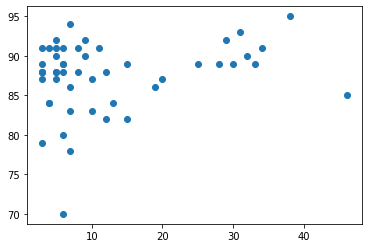

In [ ]:
plt.scatter(top50['Speechiness.'],top50['Popularity'])

La maggior parte delle canzoni presenti nella playlist ha un valore di Speechness compreso **tra 0 e 10**, questo gruppo di canzoni però ha anche una notevole varianza di popolarità, mentre il gruppo restante, dove "risiede" anche la canzone più popolare della playlist ha una varianza di popolarità decisamente inferiore.

***Correlazione tra i Dati:***

Vediamo l'indice di correlazione di Pearson dei dati presenti nel dataset che stiamo analizzando:

In [ ]:
top50.corr()

,Position,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
Position,1.000000,-0.259193,0.102649,0.122691,0.011914,0.270659,0.137329,-0.065844,-0.015993,-0.257506,-0.160680
Beats.Per.Minute,-0.259193,1.000000,0.043756,-0.094183,0.017016,-0.167286,-0.011586,-0.139288,-0.031450,0.557052,0.196097
Energy,0.102649,0.043756,1.000000,0.018254,0.670794,0.162768,0.438820,0.224677,-0.339892,-0.089860,-0.080295
Danceability,0.122691,-0.094183,0.018254,1.000000,0.016255,-0.149636,0.172829,-0.000185,-0.098165,-0.103472,-0.071413
Loudness..dB..,0.011914,0.017016,0.670794,0.016255,1.000000,0.258652,0.237614,0.219219,-0.138300,-0.272213,-0.043085
Liveness,0.270659,-0.167286,0.162768,-0.149636,0.258652,1.000000,0.016123,0.131782,0.021328,-0.125286,0.092564
Valence.,0.137329,-0.011586,0.438820,0.172829,0.237614,0.016123,1.000000,-0.017782,-0.052323,-0.053242,-0.317752
Length.,-0.065844,-0.139288,0.224677,-0.000185,0.219219,0.131782,-0.017782,1.000000,-0.076293,0.046755,-0.087639
Acousticness..,-0.015993,-0.031450,-0.339892,-0.098165,-0.138300,0.021328,-0.052323,-0.076293,1.000000,0.008293,-0.034684
Speechiness.,-0.257506,0.557052,-0.089860,-0.103472,-0.272213,-0.125286,-0.053242,0.046755,0.008293,1.000000,0.238553


Da questo possiamo trarre alcune deduzioni da analizzare:

*   ***La posizione in classifica sembra non essere "affetta" da nessun altra caratteristica/attributo. Solo la liveness arriva ad influire ma veramente poco.***
*  ***Un dato curioso è tra i Beats per Minute e la Specchness : 0.557052, il quale è un valore abbastanza alto di correlazione tra i due attributi/carattersitiche.***
*  ***L'energia di una canzone è correlata abbastanza fortemente con la sua Loudness e un po' di meno con i bpm(in questa playlist).***
*   ***Il mood positivo della canzone è parzialmente influenzato dal numero di bpm della canzone.***

In sostanza comunque i dati non sembrano essere molto correlati tra di loro, o per lo meno non sembrano esserci dati "legati" tra loro in modo rigoroso.



**OTTENIAMO COSI' I PRIMI DATI DI RIFERIMENTO**

**In conclusione di questa analisi *iniziale*** traiamo le condizioni per questa canzone perfetta.

Si consigliano le seguenti caratteristiche:
- livello di **"ballabilità"** alto (> 60 circa)
- livello di **"liveness"** basso (< 20 circa) [ovvero non è necessario avere un sentore "live" della canzone per essere popolare]
- livello di **"Acousticness"** basso per ottenere una popolarità media mentre se si sceglie alto, la popolarità può variare notevolmente
- stesso discorso di sopra per la **speechiness**, ovvero con un numero di parole troppo distinto all'interno della canzone è più difficile "ottenere" una canzone di popolarità alta rispetto ad usarne un numero limitato(es. il genere dancepop non usa molte parole all'interno delle canzoni ed è comunque molto popolare e presente all'interno della classifica, è consigliabile seguire questi esempi per arrivare ad avere una canzone competitiva)
- il **genere consigliato**:
  - *per un piazzamento medio in classifica più alto è il pop*
  - *per una popolarità più alta si può puntare sul genere latino o raeggaeton o rap(come si evince dall'ultimo box plot riportato nè il dance pop nè il pop(i generi più presenti all'interno della playlist) sono i più popolari mediamente)*.



***ANALISI sui MACRO GENERI***

Andiamo ora a **raggruppare ulteriormente i generi** per confrontarli meglio ottenendo dati più correlati tra loro per poter **affinare** ulteriormente queste caratteristiche che compongono **la nostra canzone perfetta**.

Raggruppo quindi i generi in **macro generi**.

*(es. canadian pop, panamanian pop, australian pop, ... vengono raggruppati nel macro genere pop e cosi via)*

In [ ]:
genere_pop = top50[top50['Genre']=='pop']
genere_canadian_pop = top50[top50['Genre']=='canadian pop']
genere_panamanian = top50[top50['Genre']=='panamanian pop']
genere_australian_pop = top50[top50['Genre']=='australian pop']
genere_boy_band = top50[top50['Genre']=='boy band']
maxi_genere_pop = pd.concat([genere_pop,genere_canadian_pop,genere_panamanian,genere_australian_pop,genere_boy_band],axis=0,keys=['pop', 'pop', 'pop', 'pop','pop'], names=['Genere',None])

genere_pop_house = top50[top50['Genre']=='pop house']
genere_electropop = top50[top50['Genre']=='electropop']
genere_dance_pop = top50[top50['Genre']=='dance pop']
genere_edm =  top50[top50['Genre']=='edm']
genere_brostep =  top50[top50['Genre']=='brostep']
maxi_genere_dance = pd.concat([genere_pop_house,genere_electropop,genere_dance_pop,genere_edm,genere_brostep],axis=0,keys=['dance', 'dance', 'dance', 'dance','dance'], names=['Genere',None])

genere_reggaeton = top50[top50['Genre']=='reggaeton']
genere_latin = top50[top50['Genre']=='latin']
genere_reggaeton_flow = top50[top50['Genre']=='reggaeton flow']
genere_r_and_b = top50[top50['Genre']=='r&b en espanol']
maxi_genere_reggaeton = pd.concat([genere_reggaeton,genere_reggaeton_flow,genere_latin,genere_r_and_b],axis=0,keys=['reggaeton', 'reggaeton', 'reggaeton', 'reggaeton'], names=['Genere',None])

genere_trap = top50[top50['Genre']=='trap music']
genere_country_rap = top50[top50['Genre']=='country rap']
genere_dfw_rap = top50[top50['Genre']=='dfw rap']
maxi_genere_rap = pd.concat([genere_trap,genere_country_rap,genere_dfw_rap],axis=0,keys=['rap', 'rap', 'rap'], names=['Genere',None])

genere_atl_hip_hop = top50[top50['Genre']=='atl hip hop']
genere_canadian_hip_hop = top50[top50['Genre']=='canadian hip hop']
maxi_genere_disco_hip_hop = pd.concat([genere_atl_hip_hop,genere_canadian_hip_hop],axis=0,keys=['hip hop', 'hip hop'], names=['Genere',None])

genere_big_room = top50[top50['Genre']=='big room']
genere_escape_room = top50[top50['Genre']=='escape room']
maxi_genere_room = pd.concat([genere_big_room,genere_escape_room],axis=0,keys=['room', 'room'], names=['Genere',None])

maxi_all = pd.concat([maxi_genere_pop,maxi_genere_dance,maxi_genere_reggaeton,maxi_genere_rap,maxi_genere_disco_hip_hop,maxi_genere_room],axis=0)

#1 = canadian pop,#2 = reggaeton,#3 = dance pop,#4 = pop,#5 = dfw rap,#6 = trap,#7 = country rap,
#8 = electropop,#9 = panamanian pop,#10 = canadian hip hop,#11 = latin,#12 = escape room,#13 = pop house,
#14 = reggaeton flow,#15 = australian pop,#16 = edm,#17 = atl hip hop,#18 = big room,#19 = boy band,#20 = r&b espanol,#21 = brostep
tutti_generi_numerico = [1,2,3,4,5,4,6,4,7,8,2,3,4,9,10,3,11,5,10,12,13,7,14,11,8,1,15,1,11,11,16,3,2,17,3,18,9,4,19,3,16,3,3,4,20,21,11,21,16,4]
maxi_all["Num_Genre"] = tutti_generi_numerico

macro_generi_numerico = [1,3,1,1,4,1,4,1,4,2,3,2,1,1,5,2,3,4,5,6,2,4,3,3,2,1,1,5,3,3,2,2,3,5,2,6,1,1,1,2,2,2,2,1,3,2,3,2,2,1]
#1 = pop,#2 = dance,#3 = reggaeton,#4 = rap,#5 = hip hop,#6 = room
maxi_all['NUM_macro_genre'] = macro_generi_numerico

**Ora ho** tutti **i** generi raggruppati in **macro generi**, andiamo ad estrapolarne dei dati:

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


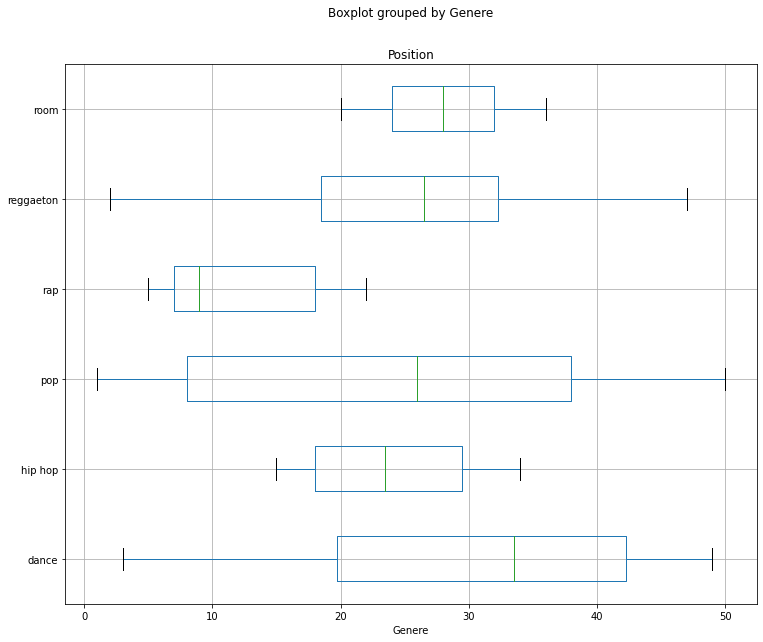

In [ ]:
maxi_all.boxplot(column= 'Position', by='Genere', vert=False, fontsize = 10, figsize = (12,10))

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


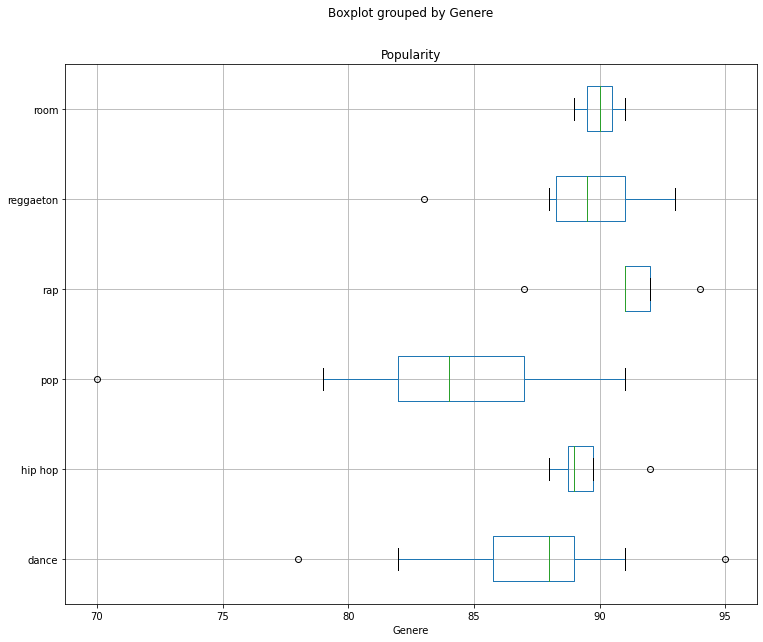

In [ ]:
maxi_all.boxplot(column= 'Popularity', by='Genere', vert=False, fontsize = 10, figsize = (12,10))

**Esaminando** questi due box plot simili a quelli effettuati su tutto il dataset direttamente,  si evince che il** macro genere pop, dance e reggaeton hanno varianza di posizionamento su tutta la classifica**.

Il **genere rap** domina la classifica dal punto di vista della **popolarità mediana** del macro genere rap rispetto a quella degli altri macrogeneri presenti in classifica.


***T-TEST***

**Proviamo** ora ad effettuare i **t-test** che prima abbiamo usato per confrontare due generi dello stesso macro-genere per confronatre appunto questi macro-generi ed estrapolarne informazioni interessanti.

***NOTA:*** 

Le **condizioni necessarie** per eseguire il t-test correttamente sono:
- **campione di almeno 30 elementi**.
- **popolazione di almeno 10 volte il numero di elementi presenti dentro il campione**.

Quindi questi risultati sotto ottenuti non possono ritenersi validi anche se appunto corrispondono ai box plot sopra riportati.

Continueremo quindi a visualizzare box plot per estrapolare ulteriori dati.

Andiamo a prendere un livello di confidenza del 95% e quindi un livello di significatività dello 0.05%.

**Verifichiamo** quindi quanto abbiamo dedotto da questi grafici sopra riportati eseguendo dei t-test di confronto tra i macro generi sopra nominati

Partiamo analizzando i **due macrogeneri piu presenti all'interno della top50: POP e DANCE**

Verifichiamo ora se possiamo accettare la seguente **ipotesi nulla**:

- La popolarità media del macro genere pop è maggiore a quella del macro genere dance

In [ ]:
t_statistic, p_value = stats.ttest_1samp(a= maxi_genere_pop['Popularity'], popmean= maxi_genere_dance['Popularity'].mean(), alternative='less')
print(t_statistic)
print(p_value)

-2.2160901182261306
0.023382981648638865


Il t-test effettuato ha riportato un p-value minore del valore di significatività e quindi bisogna **rigettare** l'ipotesi nulla e quindi concludere che 
- ***la popolarità media del macro genere dance è maggiore rispetto a quella del macro genere pop come si poteva notare direttamente nel box plot sopra riportato***.



In [ ]:
t_statistic, p_value = stats.ttest_1samp(a= maxi_genere_pop['Popularity'], popmean= maxi_genere_rap['Popularity'].mean(), alternative='less')
print(t_statistic)
print(p_value)

-4.627070431246613
0.0002915179096207425


Con questo **t-test** sopra riportato invece dimostriamo come la ***popolarità del macro genere rap sia maggiore rispetto a quella del macro genere pop che presenta la canzone posizionata al 1°posto in classifica***. 

Questo perchè ottengo un valore del **p-value ulteriormente piccolo** rispetto a quello del t-test precedente ed analogamente, possiamo dire, con maggiore "forza" rispetto a prima, che il macro genere rap presenta canzoni mediamente più popolari in classifica rispetto al macro genere pop.

*Ci sono caratteristiche/features che rendono **"vincente"** il macro genere **rap** rispetto agli altri macro generi?*

Dobbiamo **assimilare** il maggior numero di **informazioni** utili per la nostra canzone proprio da questo, prima abbiamo preso informazioni dalle migliori canzoni del genere pop per ottenere una base alla quale ora cercheremo di aggiungere le **informazioni** delle canzoni di maggior **successo** del macro genere **rap**(il quale è quello mediamente più popolare in classifica e riscontra inoltre posizionamenti alti).

**Andiamo** proprio **a vedere** il perchè di questa dominanza di questo macro genere rap rispetto agli altri macro generi per capire in cosa riesce***"ad arrivare di più alla gente"*** e ad ottenere sia un posizionamento medio più alto sia una popolarità maggiore.

Possiamo fare ciò visualizzando ulteriori box plot per confrontare direttamente il rap con tutti gli altri macrogenere dato proprio che i t-test non si possono effettuare dato le ipotesi iniziali non soddisfatte.

**Ulteriori analisi per assottigliare i dati della nostra canzone effettuata suoi macrogeneri**

***- BPM:***

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


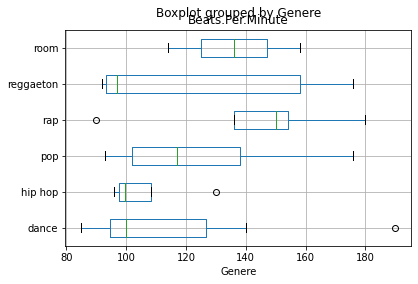

In [ ]:
maxi_all.boxplot(column= 'Beats.Per.Minute', by='Genere', vert=False)

Si riesce a vedere come il **macro genere rap abbia i bpm medi maggiori rispetto a tutti** gli altri macro generi e quindi dobbiamo considerare di aumentarli leggermente rispetto alle considerazioni precedenti.

***- Energy, Danceability e Valence:***

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tupl

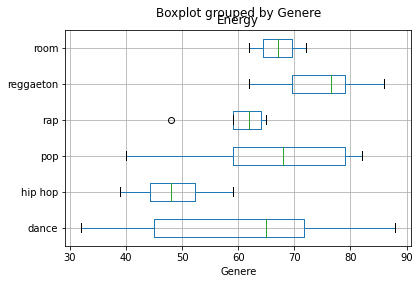

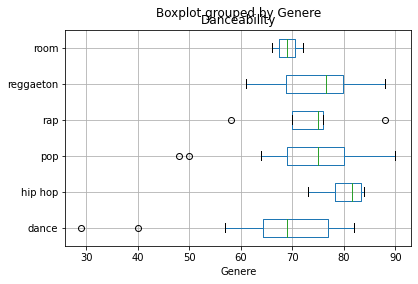

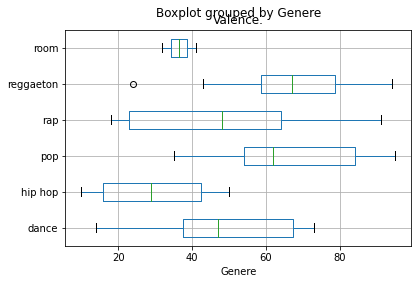

In [ ]:
maxi_all.boxplot(column= 'Energy', by='Genere', vert=False)
maxi_all.boxplot(column= 'Danceability', by='Genere', vert=False)
maxi_all.boxplot(column= 'Valence.', by='Genere', vert=False)

Da questi box plot possiamo affinare i seguenti dati:
- **il** macro genere **rap** ha un **energia** ed una **valenza** minori mediamente di quello del genere **pop** prima considerato anche se comunque i valori sono molto **simili**.
- mentre i valori di **ballabilità** della canzone in media sono pressocchè **uguali** al genere **pop**

Quindi possiamo confermare le nostre conclusioni e valori precedenti e magari considerare di avere un energia simile alla media del macro genere rap.

***- Lenght:***

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


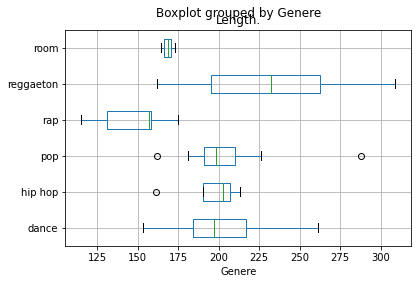

In [ ]:
maxi_all.boxplot(column= 'Length.', by='Genere', vert=False)

Si riesce a notare chiaramente dal grafico sopra riportato come il ***rap sia il macro genere con la durate delle canzoni minori***.

Quindi potremmo considerare il fatto di **abbreviare** un po' la **durata** della **nostra canzone**.

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


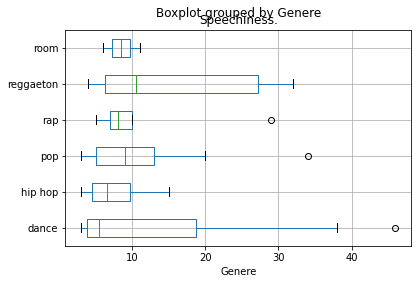

In [ ]:
maxi_all.boxplot(column= 'Speechiness.', by='Genere', vert=False)

**Questo** box plot sopra riportato **conferma** il **valore** ***precedentemente scelto*** del numero di **parole differenti** utilizzate all'interno della canzone.

Aggiungendo ciò ai nostri valori precedenti delle caratteristiche della nostra canzone riusciamo a definirci molti parametri sui quali poter eseguire una predizione.

**RAFFINATEZZA DATI**

**QUINDI SIAMO RIUSCITI AD OTTENERE DATI MIGLIORI RISPETTO ALL'ANALISI INIZIALE?**

Consideriamo quindi gli **"aggiustamenti"** considerati grazie al confronto del macro genere rap con gli altri (soprattutto con il pop sul quale ci basavamo precedentemente e dal quale non abbiamo voluto aggiugere informazioni per cercare di ottenere una canzone il più generale possibile o che comunque si potesse ispirare a più caratteristiche di canzoni anche di genere diverso)

In **conclusione**, si consigliano quindi le seguenti caratteristiche:


- livello di ***bpm****: prendiamo come riferimento un valore tra la media del genere pop e quello rap: tra 120 e 150 battiti al minuto.
- livello di ***ballabilità*** ora possiamo maggiormente affinarlo e prenderlo quindi simile alla media del genere rap ovvero: 70 (tra l'altro si conferma la nostra "predizione" precedente di avere un valore superiore di 60)
- livello di ***liveness*** basso (< 20 circa) [ovvero non è necessario avere un sentore "live" della canzone per essere popolare]
- valore di ***acousticness*** consigliato: 21.
- valore di ***speechness*** raccomandato più preciso rispetto a prima: tra 8 e 10
- valore di ***potenza***: -6.
- valore della ***lunghezza media della canzone*** consigliato: tra i 150 e 250 secondi di durata.
- valore della ***valenza*** della canzone: tra 45 e 55.
- il ***genere*** consigliato analizzando tutto quanto riportato sopra sono due:
  - il ***rap***:questo genere ha meno competitors ma quelli che ci sono hanno posizionamenti alti e molta popolarità, è un genere comunque difficile nel quale lanciare la propria canzone ma per il quale comunque vale la pena analizzando appunto la popolarità delle canzoni di questo genere che arrivano ad avere successo.
  - il ***pop***:questo invece è un genere nella quale molti artisti si riconoscono e molti "rivali" sono di altissimo livello e presenti nella top50 mesilmente/annualmente(vedi Ed Sheeran), a differenza proprio del rap dove è più facile fare la "canzone bomba" che rimane al top della classifica per stagioni e poi l'artista finisce nel dimenticatoio. Certo per sfondare nel pop comunque bisognerà appunto avere costanza nelle canzoni e cercare di trovare la giusta alchimia di tutte queste caratteristiche sulle quali ci stiamo basando per ottenere la canzone perfetta.
  
La **scelta del genere** è **particolare** e **delicata** e non si vuole ancora arrivare a conclusioni affrettate, quindi le **predizioni** future verranno eseguite su questi generi ***per capire quale è più conveniente scegliere e per quale dei due generi sia più facile predire***, o meglio, predire con più precisone ottenendo appunto un risultato più preciso, importante per un lancio di una nuova canzone nel mercato discografico(investimenti importanti).

Si cercherà inoltre di **predire** la **popolarità** di una **canzone** a seconda degli attributi che la caratterizzano.

**APPRENDIMENTO NON SUPERVISIONATO**

Questo **machine learning** servirà per risponere alle seguenti domande:

- ***è possibile predire la popolarità di una canzone a seconda dei suoi attributi/caratteristiche?***

- ***è possibile predire/assegnare un genere e macro-genere di/ad una canzone a seconda degli attributi/caratteristiche della canzone?***

Se riusciamo a risponderci a queste domande potremo testare se i dati della nostra canzone che abbiamo raccolto prima possono restituirci una canzone più o meno popolare(questo ovviamente è pianamente una stima).

La seconda domanda la proveremo direttamente sul test.

Questo quindi possiamo definirlo come un problema di **clustering** dato che cerchiamo di classificare le canzoni presenti in classifica come più o meno popolari a seconda di alcune caratteristiche che andremo ad estrapolare utilizzando la tecnica del clustering.

***L’obiettivo degli algoritmi di clustering è appunto di individuare strutture (gruppi di dati «coerenti» rispetto ad una qualche misura) all’interno dei dati.***

Quindi, **come funziona?**

Due elementi importanti:
- **Cluster**: è un gruppo di dati che si «comporta in modo analogo»
- **Centroide**: è il «centro» del cluster 

Utilizziamo l'algoritmo del Kmeans per effettuare il **fitting** e la **predizione** dei dati.

Definiamo la **funzione di silhouette** per **definirci** con esattezza il **numero di cluster** da passare in input al **KMeans** per ottenere un risultato migliore(crea i centroidi in modo randomico, quindi non tutte le esecuzioni porteranno allo stesso risultato).

**Questa funzione ci ritorna quindi un Silhouette coefficent** = **sc** il quale viene calcolato effettuando questa operazione:

- (**b** - **a**)/max(**a**,**b**) = **sc** 

dove,
- **b** è la **distanza media EXTRA_CLUSTER**(più i cluster sono lontani mediamente più otterremo un buon risultato e quindi un coefficente di silhouette alto),
- **a** è la **distanza media INTRA_CLUSTER**(più i dati all'interno dei cluster sono vicini mediamente più otterremo un buon risultato e quindi un coefficente di silhouette alto)





***Definizione funzione della silhouette***

In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans
from sklearn import preprocessing
import random

def silhouette(x):
    silhouette_avg = []
    for i in range(2, 22):
        kmeans = KMeans(n_clusters = i, max_iter = 20, random_state = 0)
        cluster_labels = kmeans.fit_predict(x)
        silhouette_avg.append(silhouette_score(x, cluster_labels))

    plt.plot(range(2, 22), silhouette_avg,'-o')
    plt.title('The silhouette method')
    plt.xlabel('Number of clusters')
    plt.ylabel('silhouette coefficient')
    plt.show()

**PREDIZIONE sulla POPOLARITA'**

***Utilizziamo tutte le features***

Proviamo ora a rispondere alla ***seconda domanda***, ovvero, ***che popolarità avrà una canzone che arriva utilizzando tutte le features a nostra disposizione***, consideriamo ora anche l'informazione aggiunta del genere e del macro genere appartenente alla canzone.

Prendiamo quindi **tutte le features** a nostra disposizione per visualizzare ed ottenere un buon risultato di predizione.

In [ ]:
features = ['Beats.Per.Minute','Energy','Danceability','Loudness..dB..','Liveness','Valence.','Length.','Acousticness..','Speechiness.','Num_Genre','NUM_macro_genre']
X=maxi_all[features]
X = np.asarray(X)
scaler = preprocessing.StandardScaler().fit(X)
X = scaler.transform(X)

**Utilizziamo** la funzione che abbiamo definito in precedenza per ottenere il numero di cluster da usare per ottenere il coefficente di **silhoette** più alto

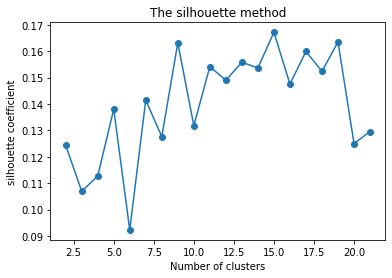

In [ ]:
silhouette(X)

**Analizzando** la silhouette la prima cosa che risalta è che è **bassissimo** il **coefficente** di **silhouette** ottenuto anche in caso di utilizzo del numero consigliato di cluster, i risultati che si otterranno saranno quindi approssimativi.

Andiamo comunque ad utilizzare il numero di **cluster** consigliato, ovvero **15**.

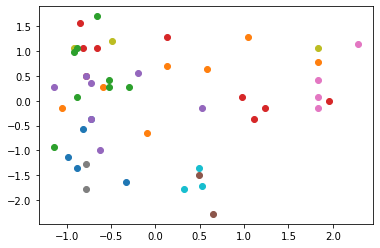

In [ ]:
kmeans=KMeans(n_clusters=15, random_state=0).fit(X)
y=kmeans.labels_
for i in range(0,15):
    plt.scatter(X[np.where(y==i),0],X[np.where(y==i),1])

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


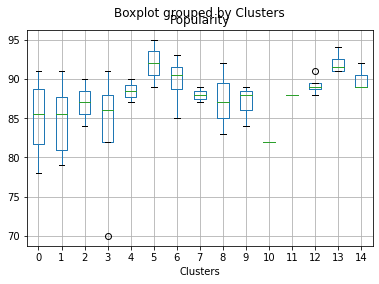

In [ ]:
maxi_all["Clusters"]=kmeans.predict(X)
maxi_all.boxplot(column='Popularity',by='Clusters')

Come si può vedere un risultato ***si riesce a visualizzare ma non si può comunque considerare un efficente risoluzione di questo problema*** di classificazione dato anche l'elevato numero di cluster e come sono disposti i punti appartenenti ai vari cluster(come si può vedere bene nel grafico a dispersione precedente).

Questo comunque ***non*** **ci stupisce proprio** grazie all'analisi dei dati:
- ***i dati non risultano essere correlati/scorrelati eccessivamente l'uno dall'altro, quindi la suddivisione in cluster non risulta efficente se effettuata su un gruppo di features cosi elevato***.
- ***il grafico della silhouette mostra subito come sia basso il coefficente di silhouette ottenuto nel tentare di risolvere questo problema utilizzando la maggior parte delle feature***.

***Non riusciamo quindi ad eseguire predizioni accurate sulla popolarità di una canzone utilizzando tutte le features a nostra disposizione***.



***Usando meno features(le più correllate)***

Andiamo quindi a provare a **diminuire** le **features** coinvolte cercando di **prendere** quelle che risultano essere più **correlate** con la popolarità e rieffettuiamo quindi l'analisi effettuata sopra.

In [ ]:
correlated_features_to_popularity = ['Beats.Per.Minute','Liveness','Speechiness.','Valence.'] 
X = maxi_all[correlated_features_to_popularity]
X = np.asarray(X)
scaler = preprocessing.StandardScaler().fit(X)
X = scaler.transform(X)

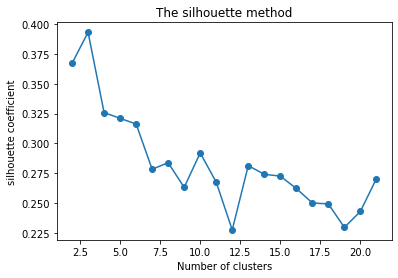

In [ ]:
silhouette(X)

Grazie a questa visualizzazione della silhouette si evince che l'**utilizzo di 3 cluster** restituisca un coefficente di silhouette maggiore rispetto alla predizione con l'uso di tutte le features(anche se **40%** non è ancora sufficentemente alto per garantire la corretta risoluzione del problema di classificazione ma è un notevole passo in avanti rispetto al circa **20% del precedente** caso).

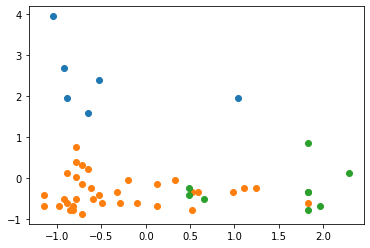

In [ ]:
kmeans=KMeans(n_clusters=3, random_state=0).fit(X)
y=kmeans.labels_
for i in range(0,3):
    plt.scatter(X[np.where(y==i),0],X[np.where(y==i),1])

I cluster ora ottenuti sono decisamente migliori rispetto ai precedenti e riusciamo quindi ad ottenere una predizione migliore come già ci aspettavamo dal valore del coefficente di silhouette riscontrato

Visualizziamo ora i box plot per visualizzare come sia migiorato rispetto all'uso di tutte le features come in precedenza(dato che erano poco correlate con la popolarità) e all'uso delle sole features correlate alla popolarità per ottenere appunto una predizione di questa in base a queste caratteristiche analizzate.

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


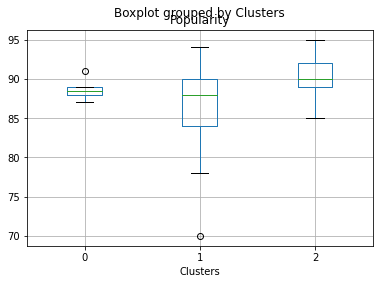

In [ ]:
maxi_all["Clusters"]=kmeans.predict(X)
maxi_all.boxplot(column='Popularity',by='Clusters')

Siamo riusciti così a separare i nostri dati rispetto a questa variabile di popolarità per poter essere restituita/assegnata a seconda del cluster al quale la canzone con quelle determinate features viene associata.

Utilizzando **tutte le features** correlate(sia positivamente che negativamente) si riesce ad ottenere un **buon risultato** di previsione utilizzando due cluster come si può visualizzare nel box plot sopra riportato. 

Siamo quindi riusciti a rispondere alle seguenti domande:

- ***predire la popolarità di una canzone appartenente a qualsiasi genere a seconda dei suoi attributi in particolare usando tutte le features;***
- ***predire la popolarità di una canzone appartenente a qualsiasi genere a seconda dei suoi attributi in particolare usando quelle correlate alla popolarità stessa (ottenendo un risultato più preciso);***



***PREDIZIONE CON ASSEGNAZIONE A CANZONI SENZA POPOLARITA'***



Dopo aver eseguito l'analisi dei dati a nostra disposizione che ci ha portato a defnire le caratteristiche o gli attributi della canzone vincente(o almeno si spera dato che comunque è) ***abbiamo costruito le basi per la predizione della popolarità** con relativo successo.

Possiamo quindi provare a risponderci effettivamente alla domanda iniziale: 
- ***come creare una canzone di successo basandoci sui suoi attributi?***

**TEST DELLA PREDIZIONE DELLA POPOLARITA' DI DUE CANZONI SU TUTTA LA CLASSIFICA**



**Inoltre** gli **andremo ad assegnare anche un macro genere di riferimento** per vedere se l'assegnazione iniziale corrisponde con la predizione.

Andiamo quindi a definire i parametri della nostra **"canzone perfetta"** utilizzando appunto i dati riportati alla fine dell'analisi iniziale.

In [ ]:
Position = len(top50['Position'])+1;
TrackName = 'Canzone di Test'
ArtistName = 'pede'
Genere = 'pop'
BPM = 140
Energy = 50
Danceability = 70
Potenza = -6
Liveness = 15
Valenza = 50
Lunghezza = 200
Acousticness = 21
Speechiness = 9
Popularity = np.nan

Andiamo **anche** quindi a definire **una canzone** che rispecchia più i dati delle canzoni **rap** analizzate precedentemente:

In [ ]:
Position2 = len(top50['Position'])+2;
TrackName2 = 'Canzone di Test 2'
ArtistName2 = 'pede'
Genere2 = 'rap'
BPM2 = 170
Energy2 = 150
Danceability2 = 100
Potenza2 = -9
Liveness2 = 50
Valenza2 = 80
Lunghezza2 = 300
Acousticness2 = 10
Speechiness2 = 30
Popularity2 = np.nan

Ora andiamo quindi a **predirre la popolarità direttamente confrontando la canzone con tutte le canzoni presenti nella playlist per vedere se ed in quale "fascia" di popolarità si potrebbe piazzare la canzone**.

Prendo quindi le **features più correlate** alla popolarità:

In [ ]:
all_correlated_features_to_popularity_for_pop = ['Beats.Per.Minute','Length.','Speechiness.','Loudness..dB..','Acousticness..','Danceability','Valence.','Liveness']

In [ ]:
top50_test = maxi_all.append({'Position': Position,'Track.Name' : TrackName , 'Artist.Name' : ArtistName, 'Genre' : Genere, 'Beats.Per.Minute' : BPM , 'Energy' : Energy, 'Danceability' : Danceability , 'Loudness..dB..' : Potenza, 'Liveness' : Liveness, 'Valence.' : Valenza, 'Length.' : Lunghezza, 'Acousticness..' : Acousticness, 'Speechiness.' : Speechiness, 'Popularity' : Popularity} , ignore_index=True)
top50_test = top50_test.append({'Position': Position2,'Track.Name' : TrackName2, 'Artist.Name' : ArtistName2, 'Genre' : Genere2, 'Beats.Per.Minute' : BPM2, 'Energy' : Energy2, 'Danceability' : Danceability2, 'Loudness..dB..' : Potenza2, 'Liveness' : Liveness2, 'Valence.' : Valenza2, 'Length.' : Lunghezza2, 'Acousticness..' : Acousticness2, 'Speechiness.' : Speechiness2, 'Popularity' : Popularity2} , ignore_index=True)

In [ ]:
#correlazione sia negativa che postivia
A = top50_test[all_correlated_features_to_popularity_for_pop]
A = np.asarray(A)
scaler = preprocessing.StandardScaler().fit(A)
A = scaler.transform(A)

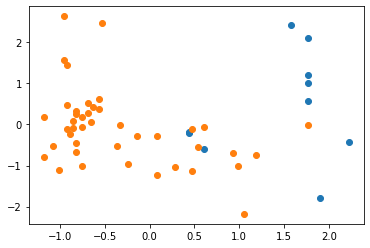

In [ ]:
kmeans=KMeans(n_clusters=2, random_state=0).fit(A)
y=kmeans.labels_
for i in range(0,2):
    plt.scatter(A[np.where(y==i),0],A[np.where(y==i),1])

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


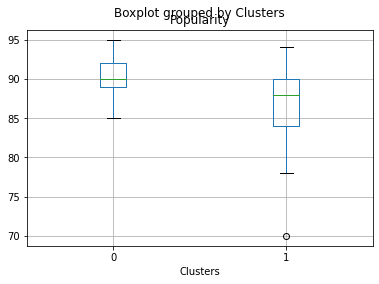

In [ ]:
top50_test["Clusters"]=kmeans.predict(A)
top50_test.boxplot(column='Popularity',by='Clusters')

In [ ]:
popolarità_media_per_cluster = top50_test.groupby('Clusters')['Popularity'].mean().astype(int)
popolarità_media_per_cluster = np.asarray(popolarità_media_per_cluster)
n_clusters = top50_test['Clusters'].unique()
top50_test=top50_test.replace(np.nan, 0)
print(popolarità_media_per_cluster)
print(n_clusters)

[90 86]
[1 0]


In [ ]:
for i in range(0,len(n_clusters)):
  top50_test.loc[((top50_test['Popularity'] <= 0) & (top50_test['Clusters'] == i)), 'Expected_Popularity'] =  popolarità_media_per_cluster[i]
  top50_test.loc[((top50_test['Popularity'] > 0) & (top50_test['Clusters'] == i)), 'Expected_Popularity'] = top50_test['Popularity']

top50_test['Popularity'] = top50_test['Expected_Popularity']

***Andiamo ora ad assegnare un macrogenere di riferimento alle canzoni in questione per avere un informazione ulteriore che ricaviamo appunto dagli attributi delle canzoni stesse.***

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


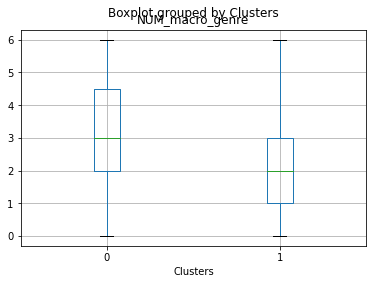

In [ ]:
top50_test["Clusters"]=kmeans.predict(A)
top50_test.boxplot(column='NUM_macro_genre',by='Clusters')

In [ ]:
genere_medio_per_cluster = top50_test.groupby('Clusters')['NUM_macro_genre'].mean().astype(int)
genere_medio_per_cluster = np.asarray(genere_medio_per_cluster)
n_clusters = top50_test['Clusters'].unique()
print(genere_medio_per_cluster)
print(n_clusters)

[3 2]
[1 0]


In [ ]:
for i in range(0,len(n_clusters)):
  top50_test.loc[((top50_test['NUM_macro_genre'] <= 0) & (top50_test['Clusters'] == i)), 'Expected_NUM_macro_genere'] =  genere_medio_per_cluster[i]
  top50_test.loc[((top50_test['NUM_macro_genre'] > 0) & (top50_test['Clusters'] == i)), 'Expected_NUM_macro_genere'] = top50_test['NUM_macro_genre']

top50_test['NUM_macro_genre'] = top50_test['Expected_NUM_macro_genere']

top50_test.tail(5)

,Position,Track.Name,Artist.Name,Genre,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity,Num_Genre,NUM_macro_genre,Clusters,Expected_Popularity,Expected_NUM_macro_genere
47,28,It's You,Ali Gatie,canadian hip hop,96,46,73,-7,19,40,213,37,3,89.0,21.0,2.0,1,89.0,2.0
48,36,Summer Days (feat. Macklemore & Patrick Stump ...,Martin Garrix,big room,114,72,66,-7,14,32,164,18,6,89.0,16.0,2.0,1,89.0,2.0
49,20,Truth Hurts,Lizzo,escape room,158,62,72,-3,12,41,173,11,11,91.0,4.0,1.0,1,91.0,1.0
50,51,Canzone di Test,pede,pop,140,50,70,-6,15,50,200,21,9,86.0,0.0,2.0,1,86.0,2.0
51,52,Canzone di Test 2,pede,rap,170,150,100,-9,50,80,300,10,30,90.0,0.0,3.0,0,90.0,3.0


Quindi possiamo **concludere** che con questa metodologia si riesce ad ottenere una predizione più o meno efficace della popolarità di una canzone rispetto agli attributi che la caratterizzano.

Inoltre **si riesce a predire** anche il genere di una canzone con una buona approssimazione.

Riusciamo così ad ottenere una risposta, anche se approssimata del nostro questito iniziale e quindi a trovare **i dati migliori per una canzone perfetta!**

